# RatInABox: Code for replicating figures in the paper 

Figures relating to the two cases studies ([reinforcement learning](../example_scripts/reinforcement_learning_example.ipynb) and [path integration](../example_scripts/path_integration_exampl.ipynb)) can be found in their respective example scripts 

### Figure 1abc 

In [1]:
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *

from tqdm import tqdm

%load_ext autoreload
%autoreload 2

In [2]:
#Leave this as False. 
#For paper/readme production I use a plotting library (tomplotlib) to format and save figures. Without this they will still show but not save. 
if False: 
    import tomplotlib.tomplotlib as tpl
    tpl.figureDirectory = "../figures/"
    tpl.setColorscheme(colorscheme=2)
    save_plots = True
    from matplotlib import rcParams, rc
    rcParams['figure.dpi']= 300
else:
    save_plots = False

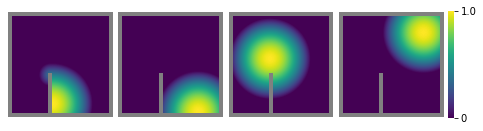

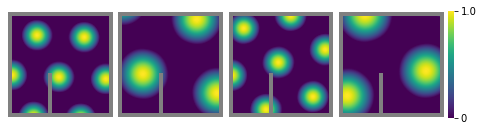

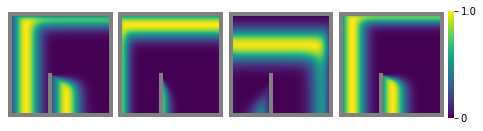

In [3]:
ratinabox.verbose=False
Env = Environment()
Env.add_wall(np.array([[0.4,0],[0.4,0.4]]))

Ag = Agent(Env)

PCs = PlaceCells(Ag,
    params={'n':4,
            'description':'gaussian_threshold',
            'widths':0.4,
            'color':'C1'
            }
)

GCs = GridCells(Ag,
    params={'n':4,
            'color':'C2'
            }
)

BVCs = BoundaryVectorCells(Ag,
    params={'n':4,
            'color':'C3'
            }
)

VCs = VelocityCells(Ag,
    params={'color':'C5'
            }
)

fig, ax = PCs.plot_rate_map()
if save_plots == True: tpl.saveFigure(fig,'PCs')
fig, ax = GCs.plot_rate_map()
if save_plots == True: tpl.saveFigure(fig,'GCs')
fig, ax = BVCs.plot_rate_map()
if save_plots == True: tpl.saveFigure(fig,'BVCs')


In [4]:
for i in tqdm(range(int(60/Ag.dt))):
    Ag.update()
    PCs.update()
    GCs.update()
    BVCs.update()
    VCs.update()

100%|██████████| 6000/6000 [00:08<00:00, 714.93it/s]


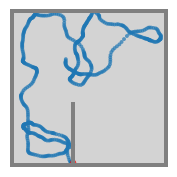

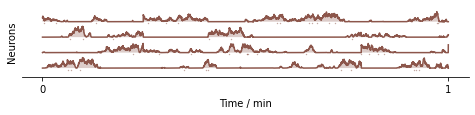

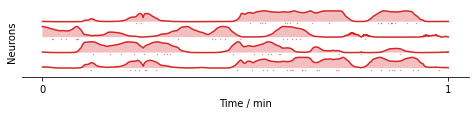

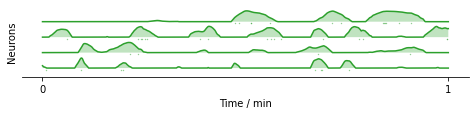

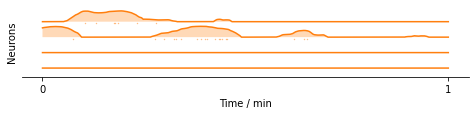

In [5]:
fig, ax = Ag.plot_trajectory()
if save_plots == True: tpl.saveFigure(fig,'trajectory')

fig, ax = VCs.plot_rate_timeseries()
if save_plots == True: tpl.saveFigure(fig,'VCs_ts')
fig, ax = BVCs.plot_rate_timeseries()
if save_plots == True: tpl.saveFigure(fig,'BVCs_ts')
fig, ax = GCs.plot_rate_timeseries()
if save_plots == True: tpl.saveFigure(fig,'GCs_ts')
fig, ax = PCs.plot_rate_timeseries()
if save_plots == True: tpl.saveFigure(fig,'PCs_ts')



### Figure 1d



100%|██████████| 1000/1000 [00:01<00:00, 508.41it/s]


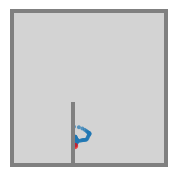

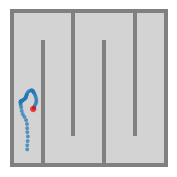

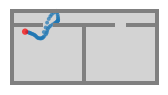

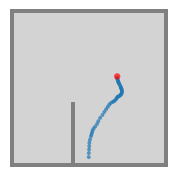

In [6]:
Env1 = Environment()
Env1.add_wall([[0,0.5],[0.2,0.5]])
Env1.add_wall([[0.3,0.5],[0.7,0.5]])
Env1.add_wall([[0.8,0.5],[1,0.5]])
Env1.add_wall([[0.5,0],[0.5,0.2]])
Env1.add_wall([[0.5,0.3],[0.5,0.7]])
Env1.add_wall([[0.5,0.8],[0.5,1]])
Ag1 = Agent(Env)
Ag1.pos = np.array([0.4,0.25])
Ag1.velocity = 0.3*np.array([1,0])


Env2 = Environment()
Env2.add_wall([[0.2,0],[0.2,0.8]])
Env2.add_wall([[0.4,1],[0.4,0.2]])
Env2.add_wall([[0.6,0],[0.6,0.8]])
Env2.add_wall([[0.8,1],[0.8,0.2]])
Ag2 = Agent(Env2)
Ag2.pos = np.array([0.1,0.1])
Ag2.velocity = 0.3*np.array([0,1])


Env3 = Environment(params={'aspect':2,
                            'scale':0.5})                    
Env3.add_wall([[0.5,0],[0.5,0.4]])
Env3.add_wall([[0,0.4],[0.2,0.4]])
Env3.add_wall([[0.3,0.4],[0.7,0.4]])
Env3.add_wall([[0.8,0.4],[1,0.4]])
Ag3 = Agent(Env3)
Ag3.pos = np.array([0.22,0.35])
Ag3.velocity = 0.3*np.array([0.5,1])


Env4 = Environment(params={'aspect':2,
                            'scale':0.5})
Env4.add_wall([[0.1,0.25],[0.5,0.45]])
Env4.add_wall([[0.4,0.3],[0.65,0.05]])
Env4.add_wall([[0.65,0.25],[0.9,0.3]])

Ag4 = Agent(Env)
Ag4.pos = np.array([0.5,0.05])
Ag4.velocity = 0.3*np.array([0,1])


train_time = 10
for i in tqdm(range(int(train_time/Ag1.dt))): 
    Ag1.update()
    Ag2.update()
    Ag3.update()
    Ag4.update()


fig1,ax1=Ag1.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig1,'fourroom')

fig2,ax2=Ag2.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig2,'hairpin')

fig3,ax3=Ag3.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig3,'tworoom')

fig4,ax4=Ag4.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig4,'random')

### Figure 1e

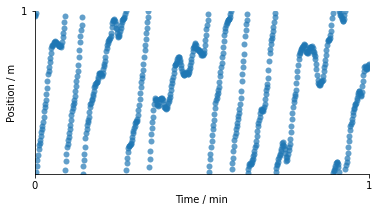

In [7]:
Env = Environment(params={'dimensionality':'1D',
                          'boundary_conditions':'periodic'})
Ag = Agent(Env,
    params={'speed_mean':0.1,
            'speed_std':0.2}
)

for i in range(int(60/Ag.dt)):
    Ag.update()

fig, ax = Ag.plot_trajectory()
if save_plots == True: tpl.saveFigure(fig,'1Dtrajectory')


## Figure 2

### Figure 2a
First we must import and analyze Sargolini et al 2006 locomotion data

In [8]:
from scipy import io
from scipy.optimize import curve_fit

def rayleigh(x,sigma,K):
    return K*x*np.e**(-x**2/(2*(sigma**2)))
def exponential(t,tau,K):
    return K*np.e**(-t/tau)
def gaussian(x,sigma,K):
    return K*np.e**(-x**2/(2*(sigma**2)))
def lagged_autocorrelation(t,x,max_t=10):
    from scipy.stats.stats import pearsonr
    R, T = [], []
    time, i = 0, 0
    while time < max_t:
        if i == 0:r = pearsonr(x,x)[0]
        else: r = pearsonr(x[i:],x[:-i])[0]
        i += 1
        T.append(t[i])
        R.append(r)
        time = t[i]
    return np.array(T), np.array(R)

#import data
mat = io.loadmat("../rawdata//8F6BE356-3277-475C-87B1-C7A977632DA7_1/11084-03020501_t2c1.mat")
x = ((mat['x1'] + mat['x2'])/2).reshape(-1)
y = ((mat['y1'] + mat['y2'])/2).reshape(-1)
t = (mat['t']).reshape(-1)
#remove nans 
y = y[np.logical_not(np.isnan(x))]
t = t[np.logical_not(np.isnan(x))]
x = x[np.logical_not(np.isnan(x))]
#normalise and put in metres
x = (x-min(x))/100
y = (y-min(y))/100
x = x + 0.5*(1-max(x))
y = y + 0.5*(1-max(y))
#downsample (so my code will later smooth it) (currently at 50Hz --> 2.5Hz)
x = x[::20]
y = y[::20]
t = t[::20]
#concatenate
pos = np.stack((x,y)).T
#make env, pass data to agent, and then upsample
Env = Environment()
Ag_s = Agent(Env)
Ag_s.import_trajectory(times=t,positions=pos)
for i in tqdm(range(int(max(t)/Ag_s.dt))):
    Ag_s.update()

Successfully imported dataset from arrays passed


100%|██████████| 59936/59936 [00:09<00:00, 6316.40it/s]


best Rayleigh sigma: 0.08065175988445959
best gaussian sigma: 117.65599059665016
best tau for speed is: 0.7243065136224692
best tau for rotational_vel is: 0.08711967797623174


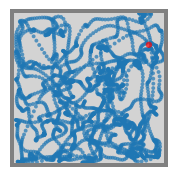

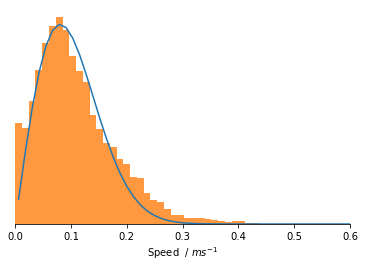

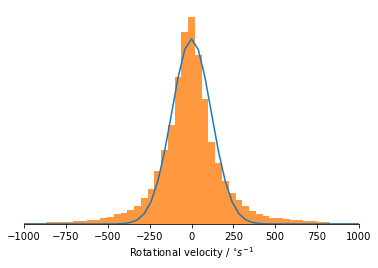

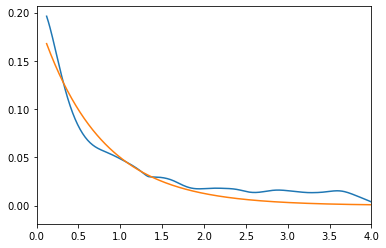

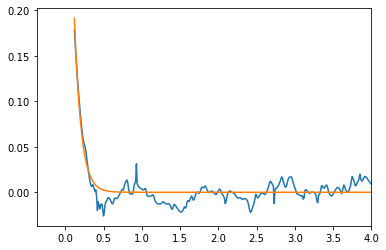

In [9]:
#plot sargolini trajectory
fig, ax = Ag_s.plot_trajectory(t_end=5*60)
if save_plots == True: tpl.saveFigure(fig,'sarg_trajectory')


#plot sargolini speed histogram 
fig, ax, y_v, x_v, patches = Ag_s.plot_histogram_of_speeds(return_data=True)
ax.set_xlim(right=0.6)
x_v = (x_v[1:]+x_v[:-1])/2
sigma, K = curve_fit(rayleigh,x_v,y_v)[0]
print("best Rayleigh sigma:",sigma)
y_fit = rayleigh(x_v,sigma,K)
ax.plot(x_v,y_fit)
if save_plots == True: 
    tpl.xyAxes(ax)
    tpl.saveFigure(fig,'sarg_rayleigh')


#plot sargolini rotational speed histogram 
fig, ax, y_v, x_v, patches = Ag_s.plot_histogram_of_rotational_velocities(return_data=True)
ax.set_xlim(left=-1000,right=1000)
x_v = (x_v[1:]+x_v[:-1])/2
sigma, K = curve_fit(gaussian,x_v,y_v,p0=np.array([1000,500]))[0]
print("best gaussian sigma:",sigma)
y_fit = gaussian(x_v,sigma,K)
ax.plot(x_v,y_fit)
if save_plots == True: 
    tpl.xyAxes(ax)
    tpl.saveFigure(fig,'sarg_normal')



t = np.array(Ag_s.history['t'])
speed = np.linalg.norm(np.array(Ag_s.history['vel']),axis=1)
speed = (speed - np.mean(speed))/np.std(speed)
lag, speed_autocorr = lagged_autocorrelation(t,speed)
lag = lag[10:]
speed_autocorr = speed_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,speed_autocorr)
tau, K = curve_fit(exponential,lag,speed_autocorr)[0]
print("best tau for speed is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(left=0,right=4)
if save_plots == True: 
    tpl.xyAxes(ax)
    tpl.saveFigure(fig,'sarg_speedac')





rot_vel = np.array(Ag_s.history['rot_vel'])
rot_vel = (rot_vel - np.mean(rot_vel))/np.std(rot_vel)
lag, rot_vel_autocorr = lagged_autocorrelation(t,rot_vel)
lag = lag[10:]
rot_vel_autocorr = rot_vel_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,rot_vel_autocorr)
tau, K = curve_fit(exponential,lag,rot_vel_autocorr)[0]
print("best tau for rotational_vel is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(right=4)
if save_plots == True: 
    tpl.xyAxes(ax)
    tpl.saveFigure(fig,'sarg_rotac')



### Figure 2b 
(the `RatInABox' version of the sargolini data )

In [11]:
Env = Environment()
Ag_r = Agent(Env)
for i in tqdm(range(int(600/Ag_r.dt))):
    Ag_r.update()

100%|██████████| 60000/60000 [00:32<00:00, 1851.45it/s]


best tau for speed is: 0.6799565629770098
best tau for rotational_vel is: 0.06484150670154216


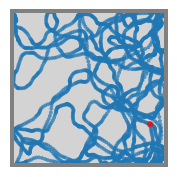

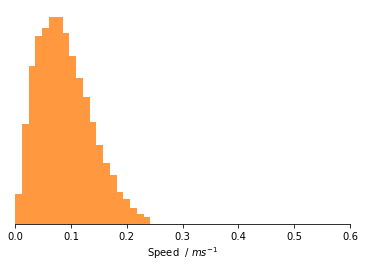

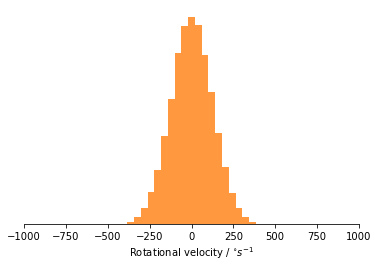

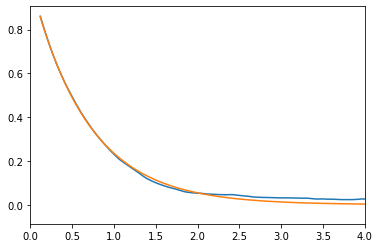

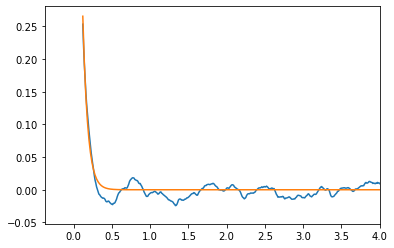

In [12]:
fig, ax = Ag_r.plot_trajectory(t_end = 60*5)
if save_plots == True: tpl.saveFigure(fig,'riab_trajectory')

fig, ax = Ag_r.plot_histogram_of_speeds()
ax.set_xlim(0,0.60)
if save_plots == True: 
    tpl.xyAxes(ax)
    tpl.saveFigure(fig,'riab_rayleigh')

fig, ax = Ag_r.plot_histogram_of_rotational_velocities()
ax.set_xlim(-1000,1000)
if save_plots == True: 
    tpl.xyAxes(ax)
    tpl.saveFigure(fig,'riab_normal')

t = np.array(Ag_r.history['t'])
speed = np.linalg.norm(np.array(Ag_r.history['vel']),axis=1)
speed = (speed - np.mean(speed))/np.std(speed)
lag, speed_autocorr = lagged_autocorrelation(t,speed)
lag = lag[10:]
speed_autocorr = speed_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,speed_autocorr)
tau, K = curve_fit(exponential,lag,speed_autocorr)[0]
print("best tau for speed is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(left=0,right=4)
if save_plots == True: 
    tpl.xyAxes(ax)
    tpl.saveFigure(fig,'riab_speedac')

rot_vel = np.array(Ag_r.history['rot_vel'])
rot_vel = (rot_vel - np.mean(rot_vel))/np.std(rot_vel)
lag, rot_vel_autocorr = lagged_autocorrelation(t,rot_vel)
lag = lag[10:]
rot_vel_autocorr = rot_vel_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,rot_vel_autocorr)
tau, K = curve_fit(exponential,lag,rot_vel_autocorr)[0]
print("best tau for rotational_vel is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(right=4)
if save_plots == True: 
    tpl.xyAxes(ax)
    tpl.saveFigure(fig,'riab_rotac')


### Figure 2c and d

In [13]:
Env = Environment()
Ag1 = Ag = Agent(Env,params={'thigmotaxis':0.8,})
Ag2 = Ag = Agent(Env,params={'thigmotaxis':0.2,})

Ag1.dt=100e-3
Ag2.dt=100e-3

for i in tqdm(range(int(90*60/Ag1.dt))):
    Ag1.update()
    Ag2.update()

100%|██████████| 54000/54000 [00:57<00:00, 937.30it/s]


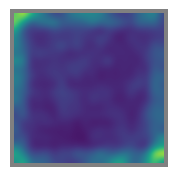

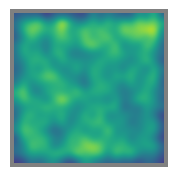

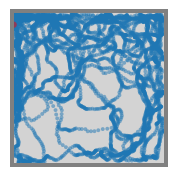

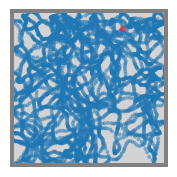

In [14]:
fig, ax = Ag1.plot_position_heatmap()
if save_plots == True: tpl.saveFigure(fig,'highthigmotaxis')
fig, ax = Ag2.plot_position_heatmap()
if save_plots == True: tpl.saveFigure(fig,'lowthigmotaxis')

fig, ax = Ag1.plot_trajectory(t_end = 60*10,alpha=0.5)
if save_plots == True: tpl.saveFigure(fig,'highthigmotaxis_traj')
fig, ax = Ag2.plot_trajectory(t_end = 60*10,alpha=0.5)
if save_plots == True: tpl.saveFigure(fig,'lowthigmotaxis_traj')

## Figure 3

### Figure 3a

2.0 26.980000000000018
50.000000000045475
1.6666666666669192
Successfully imported dataset from arrays passed
Successfully imported dataset from arrays passed


100%|██████████| 2673/2673 [00:00<00:00, 4597.92it/s]


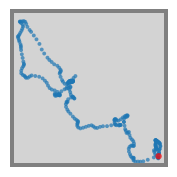

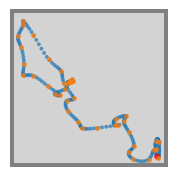

In [25]:
#import data
from scipy import io 
mat = io.loadmat("../rawdata//8F6BE356-3277-475C-87B1-C7A977632DA7_1/11084-03020501_t2c1.mat")
x = ((mat['x1'] + mat['x2'])/2).reshape(-1)
y = ((mat['y1'] + mat['y2'])/2).reshape(-1)
t = (mat['t']).reshape(-1)
#remove nans 
y = y[np.logical_not(np.isnan(x))]
t = t[np.logical_not(np.isnan(x))]
x = x[np.logical_not(np.isnan(x))]
#normalise and put in metres
x = (x-min(x))/100
y = (y-min(y))/100
x = x + 0.5*(1-max(x))
y = y + 0.5*(1-max(y))
#save_data
pos = np.stack((x,y)).T
# np.savez("../ratinabox/data/sargolini.npz",t=t,pos=pos) #(did this once but dont do it again)
#data is 10 mins, we want 10 secs
startid = np.argmin(np.abs(t-2)) #start at 2s
endid = np.argmin(np.abs(t-2-25)) #end at 27s 
x = x[startid:endid]
y = y[startid:endid]
t = t[startid:endid]
print(t[0],t[-1])
#downsample (so my code will later smooth it) (currently at 50Hz --> 2.5Hz)
print((t[1]-t[0])**-1)
x_ds = x[::30]
y_ds = y[::30]
t_ds = t[::30]
print((t_ds[1]-t_ds[0])**-1)
#concatenate
pos = np.stack((x,y)).T
pos_ds = np.stack((x_ds,y_ds)).T

Env = Environment()
Ag1 = Agent(Env)
Ag2 = Agent(Env)
Ag1.import_trajectory(times=t,positions=pos)
Ag2.import_trajectory(times=t_ds,positions=pos_ds)

for i in tqdm(range(int(t_ds[-1]/Ag2.dt))):
    Ag1.update()
    Ag2.update()

fig, ax = Ag1.plot_trajectory()
if save_plots == True: tpl.saveFigure(fig,'imported')
fig, ax = Ag2.plot_trajectory()
ax.scatter(x_ds,y_ds,c='C1',s=15,linewidth=1,zorder=11,alpha=0.7)
if save_plots == True: tpl.saveFigure(fig,'upsampled')

### Figure 3b
See reinforcement learning demo script

### Figure 3c

In [33]:
Env = Environment()
# Env.add_wall(np.array([[0.25,0.5],[0.75,0.5]]))
Ag = Agent(Env)

Ntest = 1000
PCs = PlaceCells(Ag,
    params={'n':Ntest,
            'color':'C1'
            }
)

GCs = GridCells(Ag,
    params={'n':Ntest,
            'color':'C2'
            }
)

BVCs = BoundaryVectorCells(Ag,
    params={'n':Ntest,
            'color':'C3',
            }
)


In [34]:
import time 

motion = []
pc = []
gc = []
bvc = []
matmul = []
inverse = []
 
for i in tqdm(range(100)):
    t0 = time.time()
    Ag.update()
    t1 = time.time()
    motion.append(t1-t0)

    t0 = time.time()
    PCs.update()
    t1 = time.time()
    pc.append(t1-t0)

    t0 = time.time()
    GCs.update()
    t1 = time.time()
    gc.append(t1-t0)

    t0 = time.time()
    BVCs.update()
    t1 = time.time()
    bvc.append(t1-t0)

    a = np.random.normal(size=(Ntest,))
    b = np.random.normal(size=(Ntest,Ntest))
    t0 = time.time()
    c = np.matmul(b,a)
    t1 = time.time()
    matmul.append(t1-t0)

    a = np.random.normal(size=(Ntest,Ntest))
    t0 = time.time()
    b = np.linalg.inv(a)
    t1 = time.time()
    inverse.append(t1-t0)

motion = np.array(motion)
pc = np.array(pc)
gc = np.array(gc)
bvc = np.array(bvc)
matmul = np.array(matmul)
inverse = np.array(inverse)



100%|██████████| 100/100 [00:19<00:00,  5.07it/s]


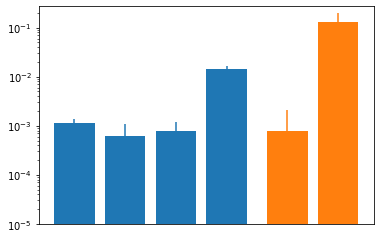

In [35]:
positions = [1,2,3,4,5.2,6.2]
heights = [motion.mean(),pc.mean(),gc.mean(),bvc.mean(),matmul.mean(),inverse.mean()]
uncertainties = [motion.std(),pc.std(),gc.std(),bvc.std(),matmul.std(),inverse.std()]
color = ['C0','C0','C0','C0','C1','C1']

fig, ax = plt.subplots()
ax.bar(positions,heights,color=color,yerr=uncertainties,ecolor=color)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-5)
ax.set_xticks([])
if save_plots == True: tpl.saveFigure(fig,'clocktimes')


## Demonstrating all plotting functions
These are figures I list in the list_of_plotting_functions file

In [26]:
Env = Environment()
Env.add_wall(np.array([[0.3,0],[0.3,0.4]]))
Ag = Agent(Env)
Ag.dt = 50e-3
PCs = PlaceCells(Ag,params={'n':100})
GCs = GridCells(Ag,params={'n':3,'color':None},)
BVCs = BoundaryVectorCells(Ag,params={'n':3,'color':None})

Env1D = Environment(params={'dimensionality':'1D'})
Ag1D = Agent(Env1D,params={'speed_mean':0.0})
Ag1D.dt = 50e-3
PCs1D = PlaceCells(Ag1D,params={'n':10,
                            'widths':0.2})

for i in tqdm(range(int(3*60/Ag.dt))):
    Ag.update()
    PCs.update()
    GCs.update()
    BVCs.update()

    Ag1D.update()
    PCs1D.update()

100%|██████████| 3600/3600 [00:05<00:00, 676.45it/s]


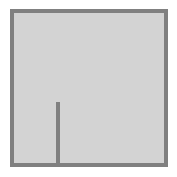

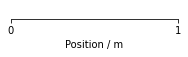

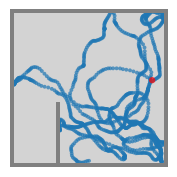

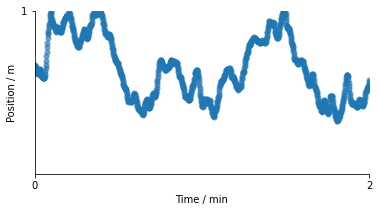

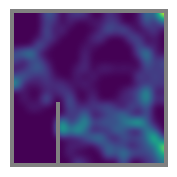

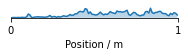

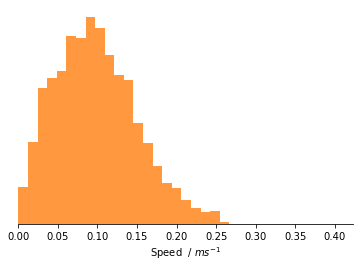

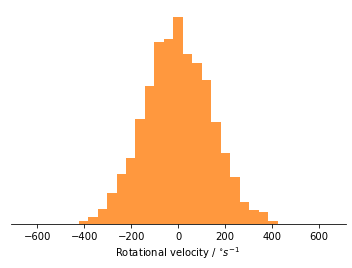

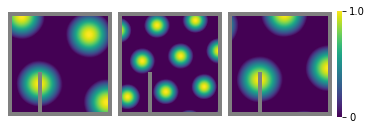

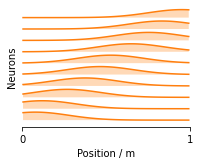

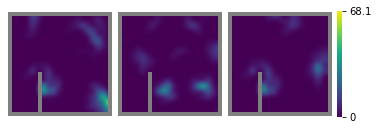

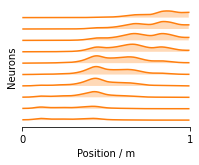

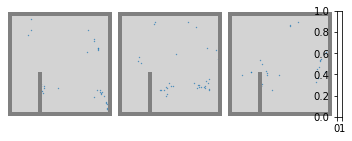

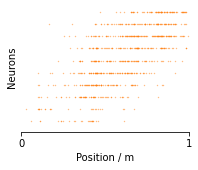

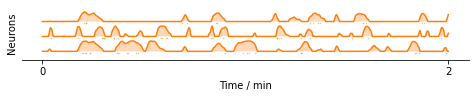

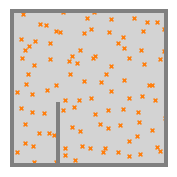

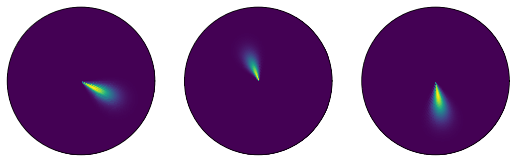

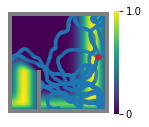

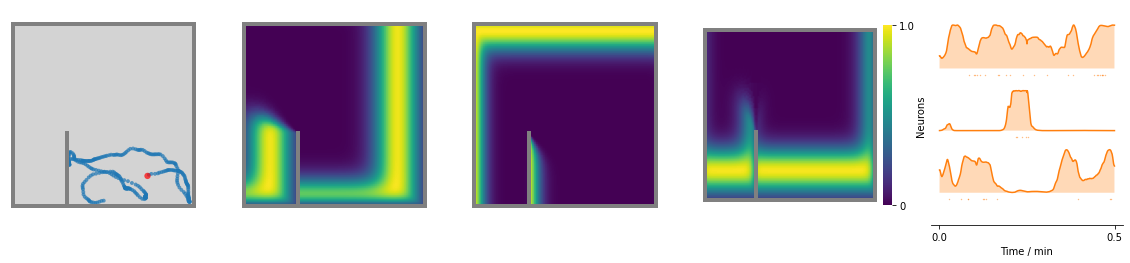

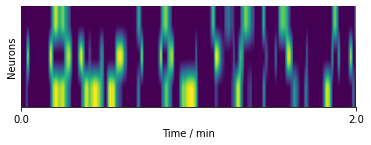

In [27]:
fig1, ax1 = Env.plot_environment()
fig2, ax2 = Env1D.plot_environment()
fig3, ax3 = Ag.plot_trajectory(t_end=120)
fig4, ax4 = Ag1D.plot_trajectory(t_end=120)
fig5, ag5 = Ag.plot_position_heatmap()
fig6, ax6 = Ag1D.plot_position_heatmap()
fig7, ax7 = Ag.plot_histogram_of_speeds()
fig8, ax8 = Ag.plot_histogram_of_rotational_velocities()
fig9, ax9 = GCs.plot_rate_map()
fig10, ax10 = PCs1D.plot_rate_map()
fig11, ax11 = GCs.plot_rate_map(method='history')
fig12, ax12 = PCs1D.plot_rate_map(method='history')
fig13, ax13 = GCs.plot_rate_map(method='neither',spikes=True)
fig14, ax14 = PCs1D.plot_rate_map(method='neither',spikes=True)
fig15, ax15 = GCs.plot_rate_timeseries(t_end=120)
fig16, ax16 = PCs.plot_place_cell_locations()
fig17, ax17 = BVCs.plot_BVC_receptive_field()
fig18, ax18 = BVCs.plot_rate_map(chosen_neurons="1")
fig18, ax18 = Ag.plot_trajectory(t_end=120,fig=fig18,ax=ax18[0])
fig19, axes19 = plt.subplots(1,5,figsize=(20,4))
fig20, ax20 = GCs.plot_rate_timeseries(t_end=120,imshow=True)
Ag.plot_trajectory(fig=fig19,ax=axes19[0],t_end=30)
BVCs.plot_rate_map(fig=fig19,ax=[axes19[1],axes19[2],axes19[3]],chosen_neurons='3') 
BVCs.plot_rate_timeseries(fig=fig19,ax=axes19[4],t_end=30) 

anim=False
if anim == True:
    anim1 = Ag.animate_trajectory(t_end=120,speed_up=2)
    anim2 = GCs.animate_rate_timeseries(t_end=120,speed_up=2)
    anim2.save("../figures/plotting_examples_save/animate_rate_timeseries.gif")



if save_plots == True: 
    tpl.figureDirectory = "../figures/plotting_examples_save/"
    
    tpl.saveFigure(fig1,"plot_env")
    tpl.saveFigure(fig2,"plot_env_1D")
    tpl.saveFigure(fig3,"plot_traj")
    tpl.saveFigure(fig4,"plot_traj_1D")
    tpl.saveFigure(fig5,"plot_heatmap")
    tpl.saveFigure(fig6,"plot_heatmap_1D")
    tpl.saveFigure(fig7,"plot_histogram_speed")
    tpl.saveFigure(fig8,"plot_histogram_rotvel")
    tpl.saveFigure(fig9,"gc_plotrm")
    tpl.saveFigure(fig10,"pc1d_plotrm")
    tpl.saveFigure(fig11,"gc_plotrm_history")
    tpl.saveFigure(fig12,"pc1d_plotrm_history")
    tpl.saveFigure(fig13,"gc_plotrm_spikes")
    tpl.saveFigure(fig14,"pc1d_plotrm_spikes")
    tpl.saveFigure(fig15,"gc_plotrts")
    tpl.saveFigure(fig16,"pc_locations")
    tpl.saveFigure(fig17,"bvc_rfs")
    tpl.saveFigure(fig18,"trajectory_on_ratemap")
    tpl.saveFigure(fig19,"multipanel_riab")
    tpl.saveFigure(fig19,"multipanel_riab")
    tpl.saveFigure(fig20,"gcs_plotrts_imshow")

    # anim1.save("../figures/plotting_examples_save/trajectory_animation.gif")

    tpl.figureDirectory = "../figures/"